In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix

In [2]:
full_data_w = [] #white wine data
full_data_r = [] #red whine data

def Pulldata(file):               #Pulling white wine data
    data_file = open(file, 'r')
    lines = data_file.readlines()
    temparr = []
    for k in lines:
        stuff = np.array(k.split(';'))
        temparr.append(stuff)    
    data_file.close()
    return(temparr)

full_data_w = Pulldata('winequality-white.csv')
full_data_r = Pulldata('winequality-red.csv')

#print(full_data_r)
#print(full_data_w)

In [3]:
#splitting data into train,validate and test data (60,20,20)%
WLabels = full_data_w[0]
del full_data_w[0]
RLabels = full_data_r[0]
del full_data_r[0]

WTrain = full_data_w[:round(len(full_data_w)*0.6)]
WValid = full_data_w[round(len(full_data_w)*0.6):round(len(full_data_w)*0.8)]
WTest  = full_data_w[round(len(full_data_w)*0.8):]

RTrain = full_data_r[:round(len(full_data_r)*0.6)]
RValid = full_data_r[round(len(full_data_r)*0.6):round(len(full_data_r)*0.8)]
RTest  = full_data_r[round(len(full_data_r)*0.8):]


print(len(WTrain))
print(len(WValid))
print(len(WTest))
print()
print(len(RTrain))
print(len(RValid))
print(len(RTest))



2939
979
980

959
320
320


In [4]:
#print(print(WTrain))

In [5]:
#Creating Design matrix : (DM) From Train Data


DMW = np.ones((len(WTrain),len(WLabels)+1))
DMR = np.ones((len(RTrain),len(RLabels)+1))


print(DMW.shape)
print(DMR.shape)

def CreateDM(DMtemp,DM):  #Function to create Design Matrix
    indexk = 0
    
    for k in DMtemp:
        indexj = 0
        for j in k:
            DM[indexk][indexj+1] = DMtemp[indexk][indexj]
            indexj=indexj+1
        indexk=indexk+1
    return(DM)        
        
DMW = CreateDM(WTrain , DMW) #Realocation of each designmatrix from ones to data

DMR = CreateDM(RTrain , DMR) #Realocation of each designmatrix from ones to data

DMW = np.delete(DMW, 13, 1)
DMR = np.delete(DMR, 13, 1)

#Creating Design Matrix for validation Data
DMWValid = np.ones((len(WValid),len(WLabels)+1))
DMRValid = np.ones((len(RValid),len(RLabels)+1))
   
DMWValid = CreateDM(WValid,DMWValid) #Realocation of each designmatrix from ones to data
DMRValid = CreateDM(RValid,DMRValid) #Realocation of each designmatrix from ones to data

DMWValid = np.delete(DMWValid, 13, 1)
DMRValid = np.delete(DMRValid, 13, 1)


#Create design matrix for Testing Data
DMWTest = np.ones((len(WTest),len(WLabels)+1))
DMRTest = np.ones((len(RTest),len(RLabels)+1))
      
DMWTest = CreateDM(WTest,DMWTest) #Realocation of each designmatrix from ones to data
DMRTest = CreateDM(RTest,DMRTest) #Realocation of each designmatrix from ones to data

DMWTest = np.delete(DMWTest, 13, 1)
DMRTest = np.delete(DMRTest, 13, 1)
 

(2939, 14)
(959, 14)


In [6]:
print(DMR)

[[ 1.    7.4   0.7  ...  0.56  9.4   5.  ]
 [ 1.    7.8   0.88 ...  0.68  9.8   5.  ]
 [ 1.    7.8   0.76 ...  0.65  9.8   5.  ]
 ...
 [ 1.    9.    0.36 ...  0.62 11.3   6.  ]
 [ 1.    9.5   0.37 ...  0.58 11.1   6.  ]
 [ 1.    6.4   0.57 ...  0.71 11.3   7.  ]]


In [7]:
def hFunction(DM,theta_values):
    return 1/(1+np.exp(-np.dot(DM,theta_values)))#H(x,Theta) Calculation

def GradientDescent(theta_values,theta_valuesOld,DM,alpha,lambduh):#Gradient Descent Function
    while np.sqrt(np.sum(np.power(theta_values - theta_valuesOld, 2))) > 0.0005: # while euclidean norm > 0.0005 (so ϵ = 0.0005) 
        theta_valuesOld = theta_values # set old parameter values to parameter values before they are updated
        for i in range(DM.shape[0]):
            copy = np.copy(theta_values)
            copy[0] = 0
            theta_values = theta_values - alpha*( (hFunction(DM[i,:12], theta_values) - DM[i][12]) * DM[i,:12] ) # update the parameters using the update rule

             
            
    return theta_values #return our theta values for this model

def convertMatrix(value,DM):  #Function to convert our design matrix for oneVsrest multiclass classification
    convDM = DM.copy()
    index = 0
    for k in DM:
        if k[12] == float(value):
            convDM[index][12] = 1
        else:
            convDM[index][12] = 0
        index = index+1
    return convDM


#soft max function
def softMax(ThetaList,TestItem):
    probabilities=[] #initialises probabilities array that holds probability for each class
    value=0
    for i in ThetaList: #loops through ThetaList 
        value=value+np.exp(np.dot(i,TestItem)) #calculates denominator of softmax function
    for j in ThetaList:
        probability=(np.exp(np.dot(j,TestItem)))/value #calculates probability of each class and appends it to the probabilties array
        probabilities.append(probability)
    return probabilities
def confuz(arr1,arr2):
    mx = np.zeros((10,10))
    for k in range(len(arr1)):
        mx[int(arr1[k])][int(arr2[k])] = mx[int(arr1[k])][int(arr2[k])]+1
    return(mx)

In [8]:
convertedDMR=convertMatrix(1,DMR)#create a converted design matrix where target variable only has two values 1 and 0 (1 represents the value you use as a parameter and 0 represents every other value besides the parameter value)
print(convertedDMR)


[[ 1.    7.4   0.7  ...  0.56  9.4   0.  ]
 [ 1.    7.8   0.88 ...  0.68  9.8   0.  ]
 [ 1.    7.8   0.76 ...  0.65  9.8   0.  ]
 ...
 [ 1.    9.    0.36 ...  0.62 11.3   0.  ]
 [ 1.    9.5   0.37 ...  0.58 11.1   0.  ]
 [ 1.    6.4   0.57 ...  0.71 11.3   0.  ]]


In [9]:
#loop for each possible quility /10
ThetaList = []
alpha=1e-4#learning rate
valuelist = []
lamduh=0.5 #regularisation

for k in range(11):
    convertedDMR=convertMatrix(k,DMR)
    theta_values=np.random.uniform(size=12)#initialize our initial thetas
    theta_valuesOld=np.zeros(12)
    theta_values=GradientDescent(theta_values,theta_valuesOld,convertedDMR,alpha,lamduh)
    ThetaList.append(theta_values)



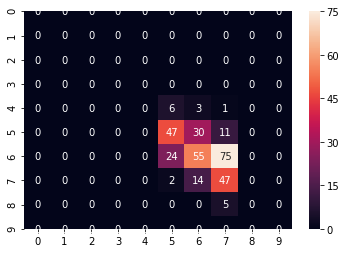

Accuracy of validation data is: 94.6875 %
Error of validation data is: 5.3125 %


In [10]:
### After running this we have:
#ThetaList from the learning phase

DMRValidAns = DMRValid[:,12]
DMRtempValid = np.delete(DMRValid, 12, 1)
#print(DMRAns)
GuessV = []
for k in range(len(DMRtempValid)):
    GuessV.append(np.argmax(softMax(ThetaList,DMRtempValid[k])))
    
#print(Guess)



confuzmc = confuz(DMRValidAns,GuessV)

index = 0
correct = 0
incorrect = 0
for k in DMRValidAns:
    if k == GuessV[index] or k == GuessV[index]+1 or k == GuessV[index]-1:
        correct=correct+1
    else:
        incorrect = incorrect+1
    index = index+1
    
    
    
df_cm = pd.DataFrame(confuzmc, range(10), range(10))    
sn.heatmap(df_cm, annot=True)
plt.show()
print("Accuracy of validation data is:",(correct/len(GuessV)*100),"%")
print("Error of validation data is:",100-(correct/len(GuessV)*100),"%")

In [11]:
plt.clf()
DMRAns = DMRTest[:,12]
DMRtempTest = np.delete(DMRTest, 12, 1)
#print(DMRAns)
Guess = []
for k in range(len(DMRtempTest)):
    Guess.append(np.argmax(softMax(ThetaList,DMRtempTest[k])))
    
#print(Guess)



#print(confuz(DMRAns,Guess))


<Figure size 432x288 with 0 Axes>

Accuracy of Test Data is: 91.5625 %
Error of Test Data is: 8.4375 %


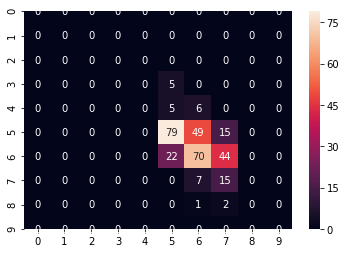

In [12]:
index = 0
correct = 0
incorrect = 0
for k in DMRAns:
    if k == Guess[index] or k == Guess[index]+1 or k == Guess[index]-1:
        correct=correct+1
    else:
        incorrect = incorrect+1
    index = index+1
print("Accuracy of Test Data is:",(correct/len(Guess)*100),"%")
print("Error of Test Data is:",100-(correct/len(Guess)*100),"%")

confizmc1 =confuz(DMRAns,Guess)
df_cm = pd.DataFrame(confizmc1, range(10), range(10))    
sn.heatmap(df_cm, annot=True)
plt.show()

In [13]:
#For white wine
#loop for each possible quility /10

ThetaListW = []
alpha=1e-4#learning rate
lamduh=0.5 #regularisation

for k in range(11):
    convertedDMW=convertMatrix(k,DMW)
    theta_values=np.random.uniform(size=12)#initialize our initial thetas
    theta_valuesOld=np.zeros(12)
    theta_values=GradientDescent(theta_values,theta_valuesOld,convertedDMR,alpha,lamduh)
    ThetaListW.append(theta_values)


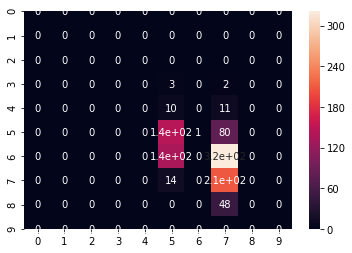

Accuracy of validation data is: 88.76404494382022 %
Error of validation data is: 11.235955056179776 %


In [14]:
DMWValidAns = DMWValid[:,12]
DMWtempValid = np.delete(DMWValid, 12, 1)
GuessV = []
for k in range(len(DMWtempValid)):
    GuessV.append(np.argmax(softMax(ThetaList,DMWtempValid[k])))

index = 0
correct = 0
incorrect = 0
for k in DMWValidAns:
    if k == GuessV[index] or k == GuessV[index]+1 or k == GuessV[index]-1:
        correct=correct+1
    else:
        incorrect = incorrect+1
    index = index+1

confizmc=confuz(DMWValidAns,GuessV)
df_cm = pd.DataFrame(confizmc, range(10), range(10))    
sn.heatmap(df_cm, annot=True)
plt.show()
print("Accuracy of validation data is:",(correct/len(GuessV)*100),"%")
print("Error of validation data is:",100-(correct/len(GuessV)*100),"%")

Accuracy of Test Data is: 87.44897959183675 %
Error of Test Data is: 12.551020408163254 %


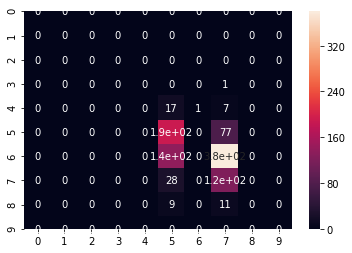

In [15]:
plt.clf()
DMWAns = DMWTest[:,12]
DMWtempTest = np.delete(DMWTest, 12, 1)

Guess = []
for k in range(len(DMWtempTest)):
    Guess.append(np.argmax(softMax(ThetaList,DMWtempTest[k])))
index = 0
correct = 0
incorrect = 0
for k in DMWAns:
    if k == Guess[index] or k == Guess[index]+1 or k == Guess[index]-1:
        correct=correct+1
    else:
        incorrect = incorrect+1
    index = index+1
print("Accuracy of Test Data is:",(correct/len(Guess)*100),"%")
print("Error of Test Data is:",100-(correct/len(Guess)*100),"%")


confizmc=confuz(DMWAns,Guess)
df_cm = pd.DataFrame(confizmc, range(10), range(10))    
sn.heatmap(df_cm, annot=True)
plt.show()

# 